#### The pandas library

__Popular Python module that provides tools for data analysis.__

> Pandas is widely used to transform raw data for data analysis and machine learning. 

We will learn: 

- data frames and data series 
- reading from files 
- data transformation 
- data visualization 
- statistical analysis


#### The Pandas library two types: 

- Dataframes
- Series

Series -> Handles pairs of values. Example 'date' and 'sales for the day'.

Dataframe -> Handles tables with multiple columns. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pprint
printer_obj = pprint.PrettyPrinter(indent=4)


In [2]:
def pp(obj):
    printer_obj.pprint(obj)

    
def print_data_and_type(data_obj):
    print_header('Data')
    print(data_obj)
    print_header('Object Type')
    print(type(data_obj))
  

In [3]:
# Helper functions

def print_header(title='', sep='.', witdh=46):
    '''Prints a formated header.'''
    title_size = len(title)
    filler_size = (witdh - (title_size + 2)) // 2
    filler_str = sep * filler_size
    if len(title) == 0:
        rfill = filler_str
    else: 
        rfill = filler_str[::-1]
        if (title_size % 2 == 1):
             rfill = rfill + rfill[0]
    print('{left}[{title}]{right}'.format(
        left=filler_str, title=title, right=rfill))

def print_separator():
    print('. ' * 25)

Creating a data series from a list

In [4]:
list1 = ['Grapes', 'Apples', 'Oranges', 'Bananas']
s1 = pd.Series(list1)
print('Data')
print(s1)
print(' ')
print('Type:', type(s1))

Data
0     Grapes
1     Apples
2    Oranges
3    Bananas
dtype: object
 
Type: <class 'pandas.core.series.Series'>


Notice that rows are given numbers, these numbers are known as indexes. Indexes start from 0 and go up.  

We can provide custom index as well. 

In [11]:
# defining list2 with indices
my_index = ['GR', 'AP', 'OR', 'BA']

# In series1 we say index=my_index
series1 = pd.Series(list1, index=my_index)
print(series1)

GR     Grapes
AP     Apples
OR    Oranges
BA    Bananas
dtype: object


Now let us define a dictionary and convert it into a series.

In [6]:
d1 = {'Z': 'Zynga', 'U': 'Uber', 'G':'Google'}
ds1 = pd.Series(d1)
ds1

Z     Zynga
U      Uber
G    Google
dtype: object

#### Pandas internally uses a library called Numpy. 
(More on this in future sessions.)

In [7]:
# Generating some arrays with Numpy
a = np.arange(10, 15)
print(a)
print(a[4])
print(np.mean(a))

[10 11 12 13 14]
14
12.0


In [8]:
import statistics
a = [1,2,3]
statistics.mean(a)

2

In [9]:
# An array of numbers
b = np.arange(20, 30)
print_header('Array')
print(b)
# transform into a 2x5 matrix.
c = b.reshape(2, 5)
print_header('Matrix')
print(c)

...................[Array]....................
[20 21 22 23 24 25 26 27 28 29]
...................[Matrix]...................
[[20 21 22 23 24]
 [25 26 27 28 29]]


Let's create a Series with 'company name' as index and its current stock 'price' as 
values. 

Notice that in the code below, we have a dictionary with two keys 
having 'None' as their values.

In [10]:
d2 = {
    'Amazon': 3352, 'Nvidia': None, 'Alphabet': 856, 'Toyota': '112', 
    'GE': 29, 'Ford': 12, 'Marriot': None, 'amazon': 1000}
print_header('Dictionary')
pp(d2)
companies_incomplete = pd.Series(d2, name='Price')
print_header('Pandas Series')
print(companies_incomplete)

.................[Dictionary].................
{   'Alphabet': 856,
    'Amazon': 3352,
    'Ford': 12,
    'GE': 29,
    'Marriot': None,
    'Nvidia': None,
    'Toyota': '112',
    'amazon': 1000}
...............[Pandas Series]................
Amazon      3352
Nvidia      None
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot     None
amazon      1000
Name: Price, dtype: object


In [19]:
# Lets use a dictionary with all values filled for now.
d2 = {
    'Amazon': 3352, 'Nvidia': 22, 'Alphabet': 856, 'Toyota': 112, \
    'GE': 29, 'Ford': 12, 'Marriot': 33, 'amazon': 1000}
print_header('Dictionary')
pp(d2)
companies = pd.Series(d2, name='Price')
print_header('Pandas Series')
print(companies)

.................[Dictionary].................
{   'Alphabet': 856,
    'Amazon': 3352,
    'Ford': 12,
    'GE': 29,
    'Marriot': 33,
    'Nvidia': 22,
    'Toyota': 112,
    'amazon': 1000}
...............[Pandas Series]................
Amazon      3352
Nvidia        22
Alphabet     856
Toyota       112
GE            29
Ford          12
Marriot       33
amazon      1000
Name: Price, dtype: int64


Using the index we can get the corresponding stock prices. Below we are 
retrieving the stock price of Ford.

In [20]:
print(companies[['Ford']])

Ford    12
Name: Price, dtype: int64


We can also get stock prices for more companies. We have to supply the indices 
that we are interested in as a list.

In [21]:
print(companies[['Ford', 'GE']])

Ford    12
GE      29
Name: Price, dtype: int64


Membership can be checked using the 'in' keyword.

In [22]:
print('Amazon' in companies)
print('Apple' in companies)

True
False


If we want to know companies for which we don't have stock price, then we have 
to use the is.null(). True will be returned for the indices that don't have a 
value and False for the indices that have 
a value.

In [23]:
print(companies_incomplete.isnull())

Amazon      False
Nvidia       True
Alphabet    False
Toyota      False
GE          False
Ford        False
Marriot      True
amazon      False
Name: Price, dtype: bool


#### Dataframes

A dataframe is a tabular data structure that consists of rows and columns. 
Dataframe is nothing but a collection of series.

Let's create a dataframe using a dicitonary as shown below.

In [26]:
c1= {
    'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
    'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
    'Price': [852, 111.2, 112, 15.2, 12.5, 88.31],
    'Unused': [1, 2, 3, 4, 5, 6]
}

companies = pd.DataFrame(c1, columns=['Name', 'Founded', 'Price'])
print(companies)

      Name  Founded   Price
0   Amazon     1994  852.00
1       GE     1923  111.20
2   Toyota     1937  112.00
3  Twitter     2006   15.20
4     Ford     1903   12.50
5  Marriot     1927   88.31


In [27]:
c1= {
    'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
    'Founded': [1994, 1923, 1937, 2006, 1903, 1927], 
    'Price': [852, 111.2, 112, 15.2, 12.5, 88.31],
    'Unused': [1, 2, 3, 4, 5, 6]
}

companies = pd.DataFrame(c1)
print(companies)

      Name  Founded   Price  Unused
0   Amazon     1994  852.00       1
1       GE     1923  111.20       2
2   Toyota     1937  112.00       3
3  Twitter     2006   15.20       4
4     Ford     1903   12.50       5
5  Marriot     1927   88.31       6


In [28]:
capitals = ["Sacramento", "Boston", "Austin", "Denver", "Phoenix"]
capseries = pd.Series(capitals)
print_data_and_type(capseries)


....................[Data]....................
0    Sacramento
1        Boston
2        Austin
3        Denver
4       Phoenix
dtype: object
................[Object Type].................
<class 'pandas.core.series.Series'>


In [29]:
state = ["CA", "MA", "TX", "CO", "AZ"]
capstate = pd.Series(capitals, index=state)
print(capstate)

CA    Sacramento
MA        Boston
TX        Austin
CO        Denver
AZ       Phoenix
dtype: object


In [31]:
print_header('Std Index', sep=' ')
capital_list = ['Springfield','Austin','Albany','Sacramento','WHAT','WHAT_1']
list_1 = pd.Series(capital_list)
print_data_and_type(list_1)
print(' ')
print_header('Custom Index', sep=' ')
# defining idx with indices
idx = ["IL","TX","NY","CA", "W1","W2"]
s_2 = pd.Series(capital_list, index = idx)
print_data_and_type(s_2)

                 [Std Index]                  
....................[Data]....................
0    Springfield
1         Austin
2         Albany
3     Sacramento
4           WHAT
5         WHAT_1
dtype: object
................[Object Type].................
<class 'pandas.core.series.Series'>
 
                [Custom Index]                
....................[Data]....................
IL    Springfield
TX         Austin
NY         Albany
CA     Sacramento
W1           WHAT
W2         WHAT_1
dtype: object
................[Object Type].................
<class 'pandas.core.series.Series'>


## Reading files

Using the dataset from: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

Reading a csv file. 

In [12]:
movies = pd.read_csv('data/imdb_movie/movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [13]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [14]:
# Getting the list of columns and printing them manually.
column_names = movies.columns
for column in column_names:
    print(column)


color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [15]:
movies_gr = movies.copy()
movies_gr = movies_gr[['aspect_ratio']]
print(type(movies_gr))
movies_gr.head()


<class 'pandas.core.frame.DataFrame'>


,aspect_ratio
0,1.78
1,2.35
2,2.35
3,2.35
4,NaN


In [16]:
# Group and count
counts = movies_gr.groupby('aspect_ratio').size()
print(type(counts))
counts.to_frame()

<class 'pandas.core.series.Series'>


,0
aspect_ratio,
1.18,1
1.20,1
1.33,68
1.37,100
1.44,1
1.50,2
1.66,64
1.75,3
1.77,1


In [17]:
counts = movies_gr.groupby('aspect_ratio').size().sort_values(ascending=False)
counts.to_frame()


,0
aspect_ratio,
2.35,2360
1.85,1906
1.78,110
1.37,100
1.33,68
1.66,64
16.00,45
2.39,15
2.20,15


In [18]:
# Print colums and types. object in most cases equals 'String'
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [19]:
# the 'shape' field contains a tuple with (num_rows, num_cols).
num_rows, num_cols = movies.shape
print('Rows : {0:>4}'.format(num_rows))
print('Cols : {0:>4}'.format(num_cols))

Rows : 5043
Cols :   28


In [20]:
movies.shape

(5043, 28)

In [21]:
type(movies)

pandas.core.frame.DataFrame

We can create a series from the movies dataframe. 

In [22]:
movies_dir = movies['director_name']
print_data_and_type(movies_dir)

....................[Data]....................
0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
5038          Scott Smith
5039                  NaN
5040     Benjamin Roberds
5041          Daniel Hsia
5042             Jon Gunn
Name: director_name, Length: 5043, dtype: object
................[Object Type].................
<class 'pandas.core.series.Series'>


Let's create a new dataframe with columns: 
movie_title, duration, budget, gross, genres, director_name.

In [23]:
newmovies = movies[['movie_title', 'duration', 'budget', 'gross', 'genres', 'director_name']]
newmovies.head()

,movie_title,duration,budget,gross,genres,director_name
0,Avatar,178.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski
2,Spectre,148.0,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,Action|Thriller,Christopher Nolan
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Documentary,Doug Walker


In [24]:
newmovies.shape

(5043, 6)

We can use sort_values() to sort a dataframe.

In [25]:
newmovies.sort_values('movie_title').head(5)

,movie_title,duration,budget,gross,genres,director_name
4447,#Horror,101.0,1500000.0,NaN,Drama|Horror|Mystery|Thriller,Tara Subkoff
3698,10 Cloverfield Lane,104.0,15000000.0,71897215.0,Drama|Horror|Mystery|Sci-Fi|Thriller,Dan Trachtenberg
3015,10 Days in a Madhouse,111.0,12000000.0,14616.0,Drama,Timothy Hines
2845,10 Things I Hate About You,97.0,16000000.0,38176108.0,Comedy|Drama|Romance,Gil Junger
279,"10,000 B.C.",22.0,NaN,NaN,Comedy,Christopher Barnard


Notice that not all values in our data frame are finite. So, now we want to drop 
rows that have NaN in any column. 

## Data Transformation

In [26]:
def print_shape(df):
    print('Shape: ' + str(df.shape))
    
def print_columns(df):
    print('-- Columns --')
    for col in df.columns:
        print(' ' + col)

In [27]:
newmovies1 = newmovies.copy(deep=True)
newmovies1.dropna(how='any', inplace=True)
print_shape(newmovies1)
newmovies1.head()

Shape: (3890, 6)


,movie_title,duration,budget,gross,genres,director_name
0,Avatar,178.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski
2,Spectre,148.0,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,Action|Thriller,Christopher Nolan
5,John Carter,132.0,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton


In [28]:
newmovies2 = newmovies.copy(deep=True)
newmovies2.dropna(subset=['duration','budget'], how='any', inplace=True)
print_shape(newmovies2)
newmovies2.head()

Shape: (4546, 6)


,movie_title,duration,budget,gross,genres,director_name
0,Avatar,178.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski
2,Spectre,148.0,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,Action|Thriller,Christopher Nolan
5,John Carter,132.0,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton


In [29]:
# Build a filter boolean array
filter_1 = (newmovies['gross']>350_000) & (newmovies['duration']<150)
filter_1.head(5)

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [30]:
# Applies the filter to the data.
filtered_df = newmovies[filter_1]
print_shape(filtered_df)

Shape: (3576, 6)


In [31]:
new_gross = newmovies[newmovies['gross']>350_000]
print_shape(new_gross)
new_gross.head()

Shape: (3759, 6)


,movie_title,duration,budget,gross,genres,director_name
0,Avatar,178.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski
2,Spectre,148.0,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,Action|Thriller,Christopher Nolan
5,John Carter,132.0,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton


## Statistical Analysis

In [32]:
newmovies1.head()

,movie_title,duration,budget,gross,genres,director_name
0,Avatar,178.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,Action|Adventure|Fantasy,Gore Verbinski
2,Spectre,148.0,245000000.0,200074175.0,Action|Adventure|Thriller,Sam Mendes
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,Action|Thriller,Christopher Nolan
5,John Carter,132.0,263700000.0,73058679.0,Action|Adventure|Sci-Fi,Andrew Stanton


In [33]:
newmovies1.describe()

,duration,budget,gross
count,3890.000000,3.890000e+03,3.890000e+03
mean,109.896401,4.520391e+07,5.106809e+07
std,22.706775,2.224177e+08,6.980668e+07
min,34.000000,2.180000e+02,1.620000e+02
25%,95.000000,1.000000e+07,6.844452e+06
50%,106.000000,2.400000e+07,2.799697e+07
75%,120.000000,5.000000e+07,6.540649e+07
max,330.000000,1.221550e+10,7.605058e+08


In [34]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [35]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


We can find how many values in each column of newmovies has NAN using isnull().

In [36]:
newmovies.isnull().sum()

movie_title        0
duration          15
budget           492
gross            884
genres             0
director_name    104
dtype: int64

In [37]:
newmovies3 = newmovies.copy(deep=True)
newmovies3['duration'].fillna(value=90, inplace=True)
newmovies3.isnull().sum()

movie_title        0
duration           0
budget           492
gross            884
genres             0
director_name    104
dtype: int64

In [38]:
movies_short = movies[["movie_title", "duration", "budget", "gross"]]

In [39]:
print(movies_short.shape)

(5043, 4)


In [40]:
movies_short["gross"].isnull().sum()

884

In [41]:
# Using copy to avoid warnings.
movie_copy = movies_short.copy()
mean_gross = movies_short["gross"].mean()
print(f'Mean Gross Amt = {mean_gross:,.2f}')


Mean Gross Amt = 48,468,407.53


In [42]:
movie_copy["gross"].fillna(value=mean_gross, inplace=True)
print(movie_copy["gross"].isnull().sum())

0


In [43]:
movies_short.head()

,movie_title,duration,budget,gross
0,Avatar,178.0,237000000.0,760505847.0
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0
2,Spectre,148.0,245000000.0,200074175.0
3,The Dark Knight Rises,164.0,250000000.0,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN


In [44]:
# Example of apply method
movie2 = movies_short.copy()
movie2['budget_in_millions'] = movie2['budget'].apply(lambda x:x/1_000_000)
movie2[['movie_title','budget_in_millions']]


,movie_title,budget_in_millions
0,Avatar,237.0000
1,Pirates of the Caribbean: At World's End,300.0000
2,Spectre,245.0000
3,The Dark Knight Rises,250.0000
4,Star Wars: Episode VII - The Force Awakens ...,NaN
...,...,...
5038,Signed Sealed Delivered,NaN
5039,The Following,NaN
5040,A Plague So Pleasant,0.0014
5041,Shanghai Calling,NaN


In [45]:
# Combining two or more columns to produce new columns
movie2['profit'] = (movie2['gross']-movie2['budget'])/1_000_000
print_columns(movie2)

-- Columns --
 movie_title
 duration
 budget
 gross
 budget_in_millions
 profit


In [46]:
movie2.head()

,movie_title,duration,budget,gross,budget_in_millions,profit
0,Avatar,178.0,237000000.0,760505847.0,237.0,523.505847
1,Pirates of the Caribbean: At World's End,169.0,300000000.0,309404152.0,300.0,9.404152
2,Spectre,148.0,245000000.0,200074175.0,245.0,-44.925825
3,The Dark Knight Rises,164.0,250000000.0,448130642.0,250.0,198.130642
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN


#### Reading files from the internet.

In [47]:
from os.path import exists

def cached_load_df(url, local_file, use_cache=True):
    if use_cache and exists(local_file):
        print('Loading from cache,', end=' ')
        result = pd.read_csv(local_file)
    else:
        result = pd.read_csv(url)
        result.to_csv(local_file, index=False)
        print('Saving to cache,', end=' ')
    print('Loaded {0} records'.format(result.shape[0]))
    return result


def load_countries_df(use_cache=True):
    return cached_load_df(
        url= 'https://mirror-v01.s3.us-west-2.amazonaws.com/countries.csv', 
        local_file = 'my_countries.csv', 
        use_cache=use_cache)

countries = load_countries_df(False)

Saving to cache, Loaded 194 records


In [48]:
countries2 = load_countries_df(True)

Loading from cache, Loaded 194 records


In [49]:
print(countries.head())
print(countries.shape)
print('Num rows = ', end=' ')
print(countries.shape[0])

    Country  Region
0   Algeria  AFRICA
1    Angola  AFRICA
2     Benin  AFRICA
3  Botswana  AFRICA
4   Burkina  AFRICA
(194, 2)
Num rows =  194


In [50]:
print(countries.dtypes)

Country    object
Region     object
dtype: object


In [51]:
print(countries.describe())

        Country  Region
count       194     194
unique      194       6
top     Algeria  AFRICA
freq          1      54


## Data Visualization 

The line below will make sure that the image created by the mathplot will be 
shown inside Jupyter notebook.

In [52]:
%matplotlib inline

Let us plot a histogram for duration time.

In [53]:
newmovies4 = newmovies3[['duration']]

<AxesSubplot: ylabel='Frequency'>

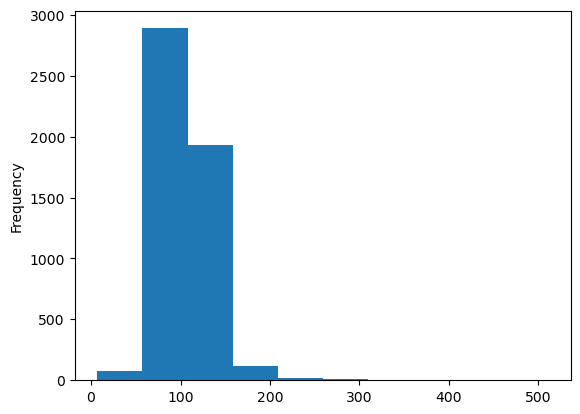

In [54]:
newmovies4.duration.plot(kind='hist')

Let's consider another dataset to understand different plotting choices. 

In [55]:
company = pd.read_csv('company.csv')
print_data_and_type(company)

....................[Data]....................
   Name  sales_budget  marketing_budget  Income
0   PLP           123                90     400
1    MX           340                85     700
2    YP            45                55     210
3    UP            27                60     200
4    QT            80               100     225
5    AD            95               100     300
6    XC            26                40     150
7    MA            72                90     220
8    GP            66                80     290
9    LA            54                70     240
10   WT            43                50     150
................[Object Type].................
<class 'pandas.core.frame.DataFrame'>


In [56]:
company = pd.read_csv('company.csv')
company = company.set_index('Name')
company.head()

,sales_budget,marketing_budget,Income
Name,,,
PLP,123,90,400
MX,340,85,700
YP,45,55,210
UP,27,60,200
QT,80,100,225


We plot a scatter plot between the columns sales_budget and marketing_budget.

<AxesSubplot: xlabel='sales_budget', ylabel='marketing_budget'>

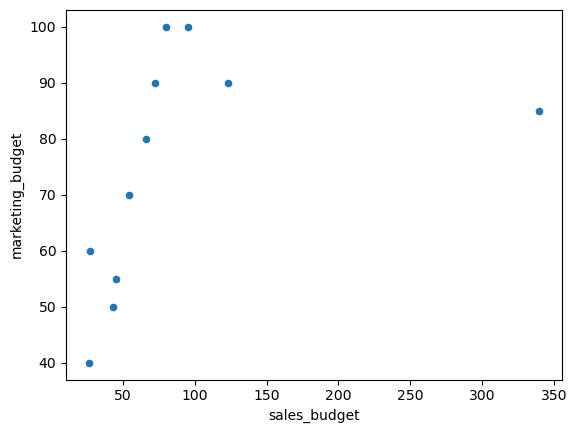

In [57]:
company.plot(kind='scatter', x='sales_budget', y='marketing_budget')

Creating a series with column sales_budget.

In [58]:
sales = company['sales_budget']
print(sales)

Name
PLP    123
MX     340
YP      45
UP      27
QT      80
AD      95
XC      26
MA      72
GP      66
LA      54
WT      43
Name: sales_budget, dtype: int64


Text(0, 0.5, 'Sales')

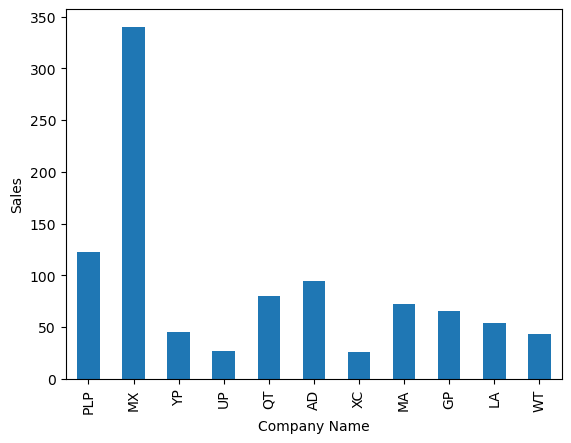

In [59]:
sales_plot = sales.plot(kind='bar')
sales_plot.set_xlabel("Company Name")
sales_plot.set_ylabel("Sales")

<AxesSubplot: xlabel='Name'>

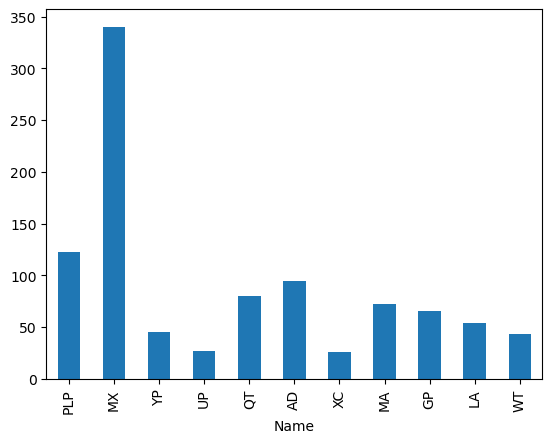

In [60]:
sales.plot(kind='bar', x="Company Name", y="Sales")

In [61]:
marketing = company["marketing_budget"]
marketing.head()

Name
PLP     90
MX      85
YP      55
UP      60
QT     100
Name: marketing_budget, dtype: int64

Text(0, 0.5, 'Marketing budget')

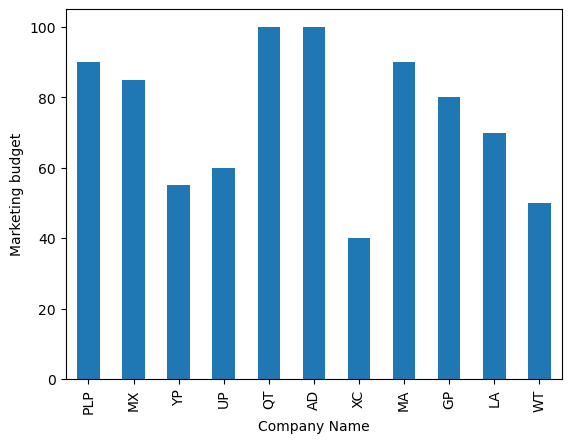

In [62]:
marketing_plot = marketing.plot(kind='bar')
marketing_plot.set_xlabel("Company Name")
marketing_plot.set_ylabel("Marketing budget")

##### Generate Series from a DataFrame 

In [63]:
test1 = {
    'Name': ['Amazon', 'GE', 'Toyota', 'Twitter', 'Ford', 'Marriot'],
    'Founded': [1994, 1923, 1937, 2006, 1903, 1927]}

df1 = pd.DataFrame(test1)
print_header('Original', sep=' ')
print_data_and_type(df1)
print(' ')

df2 = df1.drop(['Founded'], axis=1)
print_header('After Drop ', sep=' ')
print_data_and_type(df2)
print(' ')

print_header('After selecting one column', sep=' ')
ser1 = df1['Name']
print_data_and_type(ser1)
print(' ')

print_header('After selecting one column with list of fields', sep=' ')
ser1 = df1[['Name']]
print_data_and_type(ser1)
print(' ')


                  [Original]                  
....................[Data]....................
      Name  Founded
0   Amazon     1994
1       GE     1923
2   Toyota     1937
3  Twitter     2006
4     Ford     1903
5  Marriot     1927
................[Object Type].................
<class 'pandas.core.frame.DataFrame'>
 
                [After Drop ]                 
....................[Data]....................
      Name
0   Amazon
1       GE
2   Toyota
3  Twitter
4     Ford
5  Marriot
................[Object Type].................
<class 'pandas.core.frame.DataFrame'>
 
         [After selecting one column]         
....................[Data]....................
0     Amazon
1         GE
2     Toyota
3    Twitter
4       Ford
5    Marriot
Name: Name, dtype: object
................[Object Type].................
<class 'pandas.core.series.Series'>
 
[After selecting one column with list of fields]
....................[Data]....................
      Name
0   Amazon
1       GE
2   Toyot

In [64]:
# Code Style Suggestions 

budget = 200_000

# Wrong way
if budget > 170_000:
    print('large')
    
# right way
threshold_for_large_budget = 170_000 # We looked at the data picket top 80 percentile.
 
if budget > threshold_for_large_budget:
    print('large')

 

large
large


#### Pandas iLoc vs Loc

In [65]:
company.head(10)

,sales_budget,marketing_budget,Income
Name,,,
PLP,123,90,400
MX,340,85,700
YP,45,55,210
UP,27,60,200
QT,80,100,225
AD,95,100,300
XC,26,40,150
MA,72,90,220
GP,66,80,290


In [66]:
# Selecting row & columns using integer references.
company.iloc[3:5, 0:2]

,sales_budget,marketing_budget
Name,,
UP,27,60
QT,80,100


In [67]:
# Selecting row & columns using names.
company.loc['PLP':'QT', ['sales_budget', 'marketing_budget']]

,sales_budget,marketing_budget
Name,,
PLP,123,90
MX,340,85
YP,45,55
UP,27,60
QT,80,100


In [68]:
company_orig = pd.read_csv('company.csv')
print_data_and_type(company_orig)

....................[Data]....................
   Name  sales_budget  marketing_budget  Income
0   PLP           123                90     400
1    MX           340                85     700
2    YP            45                55     210
3    UP            27                60     200
4    QT            80               100     225
5    AD            95               100     300
6    XC            26                40     150
7    MA            72                90     220
8    GP            66                80     290
9    LA            54                70     240
10   WT            43                50     150
................[Object Type].................
<class 'pandas.core.frame.DataFrame'>


In [69]:
company_orig.loc[4:6, ['sales_budget', 'marketing_budget']]

,sales_budget,marketing_budget
4,80,100
5,95,100
6,26,40


#### Creating new fields

In [70]:
company_new = pd.read_csv('company.csv')
print_data_and_type(company_new)

....................[Data]....................
   Name  sales_budget  marketing_budget  Income
0   PLP           123                90     400
1    MX           340                85     700
2    YP            45                55     210
3    UP            27                60     200
4    QT            80               100     225
5    AD            95               100     300
6    XC            26                40     150
7    MA            72                90     220
8    GP            66                80     290
9    LA            54                70     240
10   WT            43                50     150
................[Object Type].................
<class 'pandas.core.frame.DataFrame'>


In [71]:
company_new['large_budget'] = company_new.sales_budget > 100
company_new.head(4)

,Name,sales_budget,marketing_budget,Income,large_budget
0,PLP,123,90,400,True
1,MX,340,85,700,True
2,YP,45,55,210,False
3,UP,27,60,200,False


#### Multiple fields in one assigment

In [72]:
company_new = pd.read_csv('company.csv')
expanded_company = company_new.assign(
    large_sales_budget=company_new.sales_budget > 100,
    large_marketing_budget=company_new.marketing_budget > 300)
expanded_company.head(10)

,Name,sales_budget,marketing_budget,Income,large_sales_budget,large_marketing_budget
0,PLP,123,90,400,True,False
1,MX,340,85,700,True,False
2,YP,45,55,210,False,False
3,UP,27,60,200,False,False
4,QT,80,100,225,False,False
5,AD,95,100,300,False,False
6,XC,26,40,150,False,False
7,MA,72,90,220,False,False
8,GP,66,80,290,False,False
9,LA,54,70,240,False,False


#### Assigning with lambda

In [73]:
company_new = pd.read_csv('company.csv')
company_with_lambda = company_new.assign(
    large_sales_budget=company_new.sales_budget > 100,
    large_marketing_budget=company_new.marketing_budget > 40,
    both_large=lambda d: d.large_sales_budget & d.large_marketing_budget
    )
company_with_lambda.head(10)

,Name,sales_budget,marketing_budget,Income,large_sales_budget,large_marketing_budget,both_large
0,PLP,123,90,400,True,True,True
1,MX,340,85,700,True,True,True
2,YP,45,55,210,False,True,False
3,UP,27,60,200,False,True,False
4,QT,80,100,225,False,True,False
5,AD,95,100,300,False,True,False
6,XC,26,40,150,False,False,False
7,MA,72,90,220,False,True,False
8,GP,66,80,290,False,True,False
9,LA,54,70,240,False,True,False


#### Wide and Long Datasets

In [74]:
data = pd.DataFrame({
    'Day':   ['08/01', '08/02', '08/03', '08/04',    '08/05'],
    'Ford':   [1.03,    1.05,    1.07,    1.09,      1.11],
    'Apple':  [2.01,    2.03,    2.05,    2.07,      2.09],
    'Amazon': [3.02,    3.04,    3.06,    3.08,      3.10],
    'GE':     [4.04,    4.05,    4.06,    4.07,      4.08],
})


In [75]:
melted_data = data.melt(id_vars=['Day'], var_name='Company', value_name='Price')
melted_data.head(10)

,Day,Company,Price
0,08/01,Ford,1.03
1,08/02,Ford,1.05
2,08/03,Ford,1.07
3,08/04,Ford,1.09
4,08/05,Ford,1.11
5,08/01,Apple,2.01
6,08/02,Apple,2.03
7,08/03,Apple,2.05
8,08/04,Apple,2.07
9,08/05,Apple,2.09


In [76]:
# Convert from long to wide
pivoted_data = melted_data.pivot(index="Day", columns=["Company"], values="Price")
pivoted_data

Company,Amazon,Apple,Ford,GE
Day,,,,
08/01,3.02,2.01,1.03,4.04
08/02,3.04,2.03,1.05,4.05
08/03,3.06,2.05,1.07,4.06
08/04,3.08,2.07,1.09,4.07
08/05,3.10,2.09,1.11,4.08


In [77]:
piv_copy = pivoted_data.copy()
piv_copy.reset_index(inplace=True)
piv_copy

Company,Day,Amazon,Apple,Ford,GE
0,08/01,3.02,2.01,1.03,4.04
1,08/02,3.04,2.03,1.05,4.05
2,08/03,3.06,2.05,1.07,4.06
3,08/04,3.08,2.07,1.09,4.07
4,08/05,3.10,2.09,1.11,4.08


In [78]:
back_to_melted  = piv_copy.melt(id_vars=['Day'])
back_to_melted.columns = ['Day', 'Company', 'Price']
back_to_melted

,Day,Company,Price
0,08/01,Amazon,3.02
1,08/02,Amazon,3.04
2,08/03,Amazon,3.06
3,08/04,Amazon,3.08
4,08/05,Amazon,3.10
5,08/01,Apple,2.01
6,08/02,Apple,2.03
7,08/03,Apple,2.05
8,08/04,Apple,2.07
9,08/05,Apple,2.09
